In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fiat_cars.csv')

In [3]:
# Boş değerlerin sayısını kontrol etme
print(df.isnull().sum())

Model    0
Year     0
Km       0
Color    0
Price    0
dtype: int64


In [4]:
# Veri tiplerini görüntüleme
print(df.dtypes)

Model     object
Year       int64
Km       float64
Color     object
Price     object
dtype: object


In [5]:
# 1. TL ifadesini kaldırma
df['Price'] = df['Price'].str.replace('TL', '', regex=False)

# 2. Noktaları kaldırma ve virgülleri nokta ile değiştirme
df['Price'] = df['Price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# 3. Float'a dönüştürme
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Kontrol etme
print(df)
print(df['Price'].dtype)

                                     Model  Year     Km        Color   Price
0      Fiat Linea 1.3 Multijet Active Plus  2012  370.0        Beyaz  279900
1             Fiat Egea 1.6 Multijet Urban  2022   91.0         Mavi  945000
2    Fiat Punto Grande 1.3 Multijet Active  2009  199.5          Gri  350000
3         Fiat Egea 1.3 Multijet Easy Plus  2023   19.0  Gri (Gümüş)  895000
4               Fiat Punto EVO 1.4 Dynamic  2012   78.0        Bordo  580000
..                                     ...   ...    ...          ...     ...
495                  Fiat Palio 1.2 Active  2005  163.0          Gri  317000
496               Fiat Egea 1.4 Fire Urban  2020   23.0        Beyaz  600000
497      Fiat Egea 1.6 Multijet Urban Plus  2020  100.0        Beyaz  820000
498                Fiat Egea 1.4 Fire Easy  2023   19.5          Gri  750000
499            Fiat Egea 1.3 Multijet Easy  2016  176.0          Gri  519000

[500 rows x 5 columns]
int64


In [6]:
from scipy import stats
import numpy as np

# Sadece sayısal sütunlar için Z-score hesaplama
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print((z_scores > 3).sum())  # Aykırı değer sayısını kontrol etme


Year     0
Km       0
Price    0
dtype: int64


In [7]:
# Özet istatistikleri görüntüleme
print(df.describe())


              Year         Km          Price
count   500.000000  500.00000     500.000000
mean   2016.620000  126.85396  620817.980000
std       6.474522   90.88831  181856.924506
min    1999.000000    7.00000  249800.000000
25%    2016.000000   60.00000  533500.000000
50%    2019.000000   94.25000  662000.000000
75%    2021.000000  176.00000  750000.000000
max    2023.000000  370.00000  945000.000000


In [8]:
# Kategorik sütundaki benzersiz değerleri görüntüleme
print(df['Model'].unique())


['Fiat Linea 1.3 Multijet Active Plus' 'Fiat Egea 1.6 Multijet Urban'
 'Fiat Punto Grande 1.3 Multijet Active'
 'Fiat Egea 1.3 Multijet Easy Plus' 'Fiat Punto EVO 1.4 Dynamic'
 'Fiat Egea 1.4 Fire Easy Stil' 'Fiat Albea 1.3 Multijet SL'
 'Fiat Egea 1.6 E-Torq Urban' 'Fiat Palio 1.4 EL'
 'Fiat Egea 1.4 Fire Easy Plus' 'Fiat Egea 1.3 Multijet Urban'
 'Fiat Marea 1.6 ELX' 'Fiat Egea 1.3 Multijet Easy'
 'Fiat Egea 1.6 Multijet Easy' 'Fiat Egea 1.4 Fire Easy'
 'Fiat Palio 1.6 HL' 'Fiat Punto 1.3 Multijet Pop'
 'Fiat Egea 1.4 Fire Urban Plus' 'Fiat Egea 1.6 Multijet Comfort'
 'Fiat Egea 1.3 Multijet Mirror' 'Fiat Linea 1.3 Multijet Pop'
 'Fiat Egea 1.4 Fire Mirror' 'Fiat Egea 1.4 Fire Urban'
 'Fiat Albea 1.3 Multijet EL' 'Fiat Punto 1.4 Dynamic'
 'Fiat Palio 1.2 Active' 'Fiat Egea 1.6 Multijet Urban Plus']


In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [10]:
import pandas as pd
from sklearn.cluster import KMeans

In [11]:
# K-Means için veriyi hazırlama
price_data = df[['Price']]

# K-Means modelini oluşturma (3 kümeye ayırmak için n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
 
df['Price_Category'] = kmeans.fit_predict(price_data)

# Kümeleri anlamlı etiketlere dönüştürme
# Kümelerin merkezlerini bulma ve buna göre etiket atama
cluster_centers = kmeans.cluster_centers_.flatten()
labels = ['Ucuz', 'Orta', 'Pahalı']
sorted_labels = [label for _, label in sorted(zip(cluster_centers, labels))]

# Kümeleri etiketleme
df['Price_Category'] = df['Price_Category'].map(dict(enumerate(sorted_labels)))

# Sonucu görüntüleme
print(df[['Price', 'Price_Category']])

      Price Price_Category
0    279900           Ucuz
1    945000         Pahalı
2    350000           Ucuz
3    895000         Pahalı
4    580000           Orta
..      ...            ...
495  317000           Ucuz
496  600000           Orta
497  820000         Pahalı
498  750000         Pahalı
499  519000           Orta

[500 rows x 2 columns]


In [12]:
# Yeni sütun ile veriyi CSV dosyasına kaydetme
df.to_csv('k-mean_fiat.csv', index=False)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Küme merkezlerini ve etiketleri inceleme
cluster_centers = kmeans.cluster_centers_.flatten()
print(f"Küme merkezleri: {cluster_centers}")

Küme merkezleri: [644419.23076923 328827.27272727 820684.53846154]


In [15]:
# Küme etiketlerinin dağılımı
print(df['Price_Category'].value_counts())

Price_Category
Orta      260
Pahalı    130
Ucuz      110
Name: count, dtype: int64


In [16]:
# Küme etiketlerini sayısal etiketlerle eşleştirme
kume_etiketleri = {0: 'Ucuz', 1: 'Orta', 2: 'Pahalı'}

# Küme etiketlerini Price_Category sütununa atama
df['Price_Category_Label'] = df['Price_Category'].map(kume_etiketleri)

# Price_Category sütununun değerlerini 0, 1, 2 olarak değiştirme
df['Price_Category'] = df['Price_Category'].map({ 'Ucuz': 0, 'Orta': 1, 'Pahalı': 2 })

# Küme dağılımını kontrol etme
print(df['Price_Category'].value_counts())

Price_Category
1    260
2    130
0    110
Name: count, dtype: int64


In [17]:
# Her küme için istatistiksel göstergeler
for i in range(3):
    cluster_data = df[df['Price_Category'] == i]['Price']
    print(f"Küme {i} - Nesne sayısı: {len(cluster_data)}")
    print(f"  Min: {cluster_data.min()}")
    print(f"  Max: {cluster_data.max()}")
    print(f"  Ortalama: {cluster_data.mean()}")
    print(f"  Standart Sapma: {cluster_data.std()}")
    print()

Küme 0 - Nesne sayısı: 110
  Min: 249800
  Max: 436900
  Ortalama: 328827.2727272727
  Standart Sapma: 61638.76849422426

Küme 1 - Nesne sayısı: 260
  Min: 519000
  Max: 725000
  Ortalama: 644419.2307692308
  Standart Sapma: 61907.49743599919

Küme 2 - Nesne sayısı: 130
  Min: 750000
  Max: 945000
  Ortalama: 820684.5384615385
  Standart Sapma: 54261.21024691348



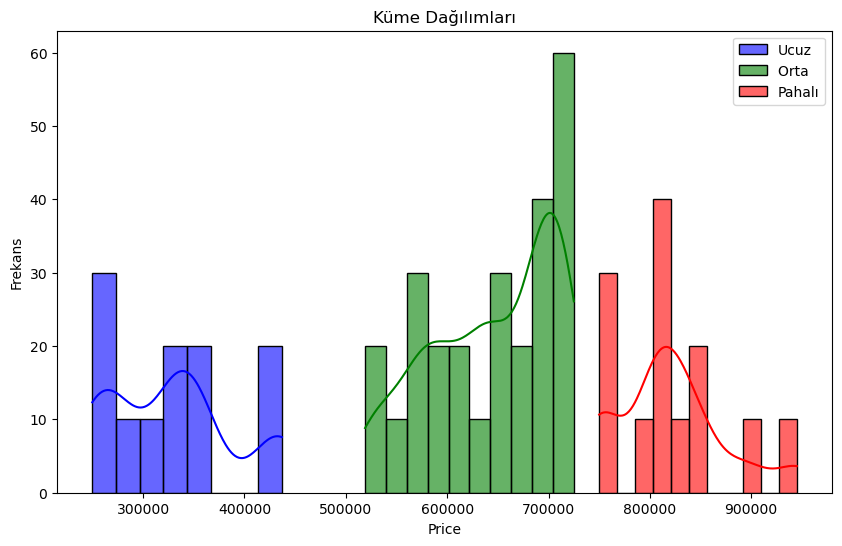

In [18]:
# Histogramlar ve dağılımlar için grafikler
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Price_Category'] == 0]['Price'], kde=True, label='Ucuz', color='blue', alpha=0.6)
sns.histplot(df[df['Price_Category'] == 1]['Price'], kde=True, label='Orta ', color='green', alpha=0.6)
sns.histplot(df[df['Price_Category'] == 2]['Price'], kde=True, label='Pahalı', color='red', alpha=0.6)
plt.title('Küme Dağılımları')
plt.xlabel('Price')
plt.ylabel('Frekans')
plt.legend()
plt.savefig('kume_dagilimi.png')  # Histogramın görselini kaydetme
plt.show()

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="viridis")
plt.title('Her Kümedeki Nesne Sayısı')
plt.xlabel('Küme')
plt.ylabel('Nesne Sayısı')
plt.savefig('kume_nesne_sayisi.png')  # Bar grafik görselini kaydetme
plt.show()

NameError: name 'cluster_sizes' is not defined

<Figure size 600x400 with 0 Axes>

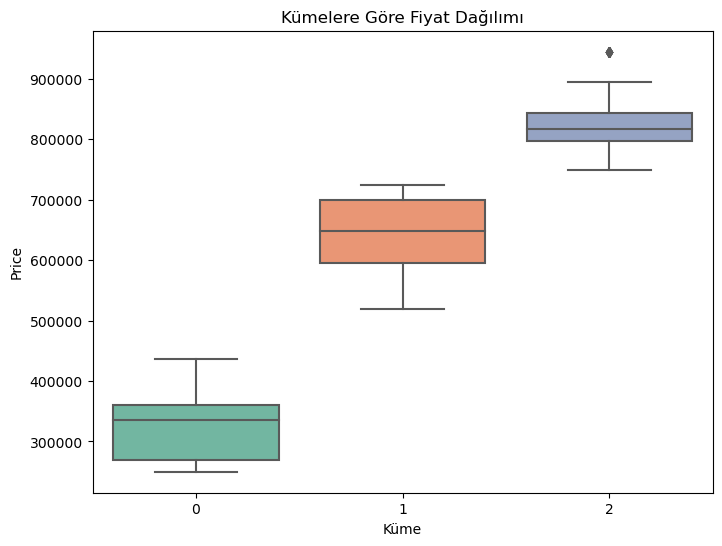

In [20]:
# Kümeler arası karşılaştırma
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price_Category', y='Price', data=df, palette="Set2")
plt.title('Kümelere Göre Fiyat Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Price')
plt.savefig('kume_price_boxplot.png')  # Boxplot görselini kaydetme
plt.show()

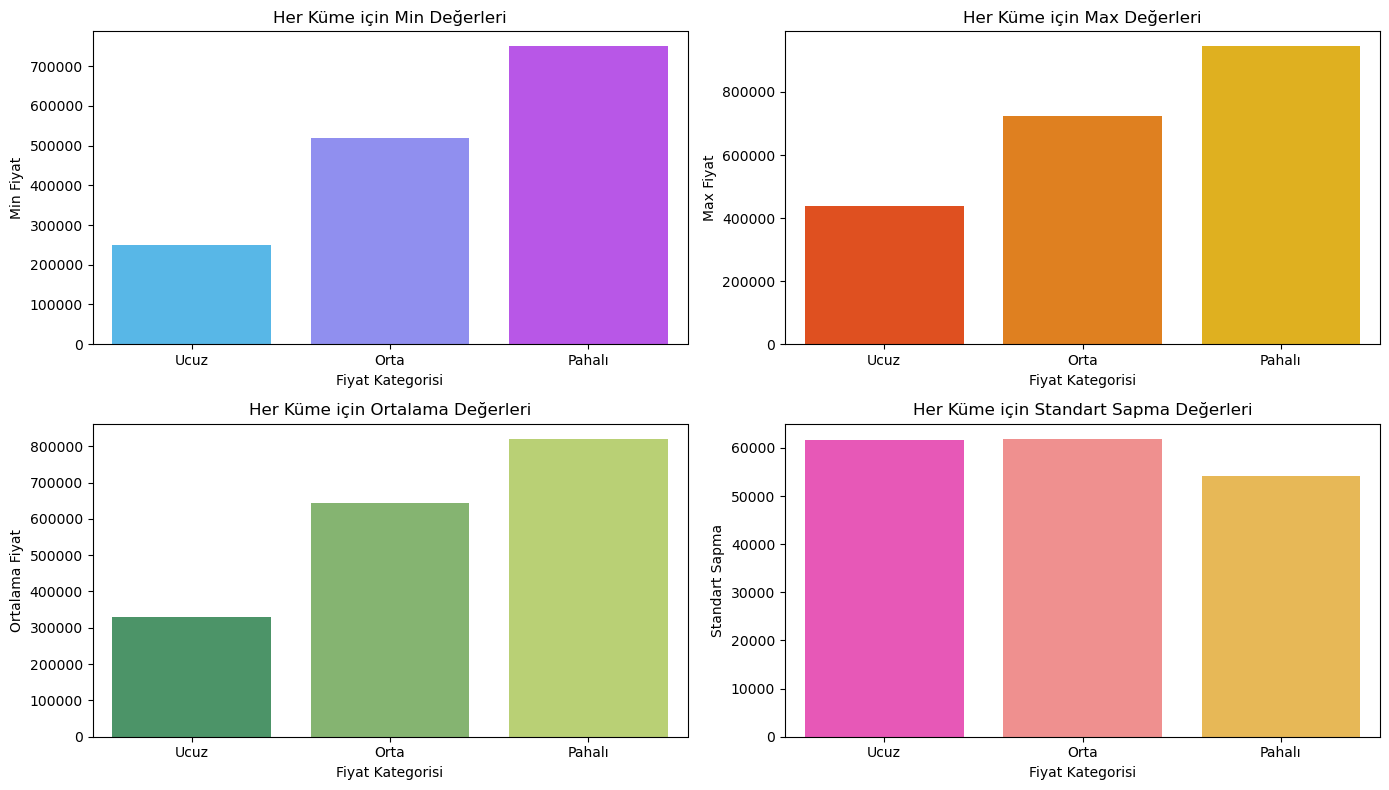

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her küme için min, max, ortalama ve standart sapma hesaplama
kume_istatistikleri = df.groupby('Price_Category').agg({
    'Price': ['min', 'max', 'mean', 'std']
}).reset_index()

# İstatistik sütunlarını adlandırma
kume_istatistikleri.columns = ['Price_Category', 'Min', 'Max', 'Mean', 'Std']
kume_istatistikleri['Price_Category'] = kume_istatistikleri['Price_Category'].map({0: 'Ucuz', 1: 'Orta', 2: 'Pahalı'})

# Görselleştirme
plt.figure(figsize=(14, 8))

# Min Değerleri
plt.subplot(2, 2, 1)
sns.barplot(x='Price_Category', y='Min', data=kume_istatistikleri, palette='cool')
plt.title('Her Küme için Min Değerleri')
plt.xlabel('Fiyat Kategorisi')
plt.ylabel('Min Fiyat')

# Max Değerleri
plt.subplot(2, 2, 2)
sns.barplot(x='Price_Category', y='Max', data=kume_istatistikleri, palette='autumn')
plt.title('Her Küme için Max Değerleri')
plt.xlabel('Fiyat Kategorisi')
plt.ylabel('Max Fiyat')

# Ortalama Değerleri
plt.subplot(2, 2, 3)
sns.barplot(x='Price_Category', y='Mean', data=kume_istatistikleri, palette='summer')
plt.title('Her Küme için Ortalama Değerleri')
plt.xlabel('Fiyat Kategorisi')
plt.ylabel('Ortalama Fiyat')

# Standart Sapma Değerleri
plt.subplot(2, 2, 4)
sns.barplot(x='Price_Category', y='Std', data=kume_istatistikleri, palette='spring')
plt.title('Her Küme için Standart Sapma Değerleri')
plt.xlabel('Fiyat Kategorisi')
plt.ylabel('Standart Sapma')

plt.tight_layout()
plt.savefig('kume_istatistikleri_yeni.png')  # Grafiklerin görselini kaydetme
plt.show()
